# A. Objective:
A used car dealer in UK desires to put in place an automated mechanism to estimate the resale price of a used mercedes car basis the multiple data points on the car like age, miles run, transmission type etc. 

The learning task is to build a predictive model capable of doing the same with as less error as feasible. 

# B. Data Description:

Data Source : [Kaggle](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes)

The data has 13119 rows & 9 columns. All cars belong to Mercedes brand in UK.

**Feature Details** :

1. **model**: the model name of the car

2. **year**: the year of registration of car

3. **transmission**: the transsmission type of car - Semi-Automatic, Automatic, Manual, Other

4. **miles**: total miles that the car has run

5. **fuelType**: type of fuel that car runs on - Diesel, Petrol, Hybrid, Other

6. **tax**: the tax on car in UK pounds

7. **mpg**: miles run by car per gallon of fuel

8. **engineSize**: the engine size of car in litres

9. **price**: the resale price of car in UK pounds - TARGET VARIABLE

# C. Importing Required Libraries & Data:

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the data
merc = pd.read_csv('merc.csv')

# D. Exploratory Data Analysis

### D1. Exploring first 5 rows of data

In [3]:
merc.head()

,model,year,price,transmission,miles,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


**Observations:**
- **3 categorical features** --> 'model', 'transmission', 'fuelType'
- **6 numerical features** --> 'year', 'price', 'miles', 'tax', 'mpg','engineSize'
- The target variable is continuous

### D2. Exploring shape of dataframe & column data types

In [4]:
merc.shape

(13119, 9)

In [5]:
merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
model           13119 non-null object
year            13119 non-null int64
price           13119 non-null int64
transmission    13119 non-null object
miles           13119 non-null int64
fuelType        13119 non-null object
tax             13119 non-null int64
mpg             13119 non-null float64
engineSize      13119 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


**Observations:**
- We note that the dataset has 9 columns and 13119 records
- Also it is seen that the categorical columns of 'model', 'transmission & 'fuelType' have object data type

### D3. Checking for duplicates

In [6]:
len(merc)-len(merc.drop_duplicates())

259

**Observation:** There are 259 duplicate observations. For now, we drop them from the database. 

In [7]:
# dropping rows that have exactly same value for all features
merc.drop_duplicates(inplace=True)

# re-checking the dataframe's shape
merc.shape 

(12860, 9)

### D4. Checking for any missing values

In [8]:
# checking number of missing values in each column
merc.isna().sum()

model           0
year            0
price           0
transmission    0
miles           0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

**Observation:** There are no missing values in any column

### D5. Extracting 'age' of car

In [9]:
# calculating car age by subtracting the year of registration of car from the most recent year of registration(2020)
merc['age'] = merc['year'].max() - merc['year']

#dropping the year column
merc.drop('year', axis=1, inplace=True)

### D6. Exploring statistical summary

In [10]:
print('Statistical summary of numerical features: \n')
merc.describe()

Statistical summary of numerical features: 



,price,miles,tax,mpg,engineSize,age
count,12860.000000,12860.000000,12860.000000,12860.000000,12860.000000,12860.000000
mean,24636.426361,22169.588336,129.843701,55.197535,2.075381,2.732037
std,11874.220447,21077.039295,65.580514,15.181133,0.573434,2.226127
min,650.000000,1.000000,0.000000,1.100000,0.000000,0.000000
25%,17309.750000,6494.000000,125.000000,45.600000,1.800000,1.000000
50%,22299.000000,15448.500000,145.000000,56.500000,2.000000,2.000000
75%,28971.250000,32000.000000,145.000000,64.200000,2.100000,4.000000
max,159999.000000,259000.000000,580.000000,217.300000,6.200000,50.000000


**Observations :**

* **price** - The min and max values are far from nearest quartiles, indicating presence of extreme values.

* **miles** - Presence of extreme values and considerable skewness (as median closer to quatile Q1 & median < mean)

* **tax** - Presence of extreme values

* **mpg**- Min value is 1.1 which seems to be an error. Presence of extreme values.

* **engineSize** - Min value is 0.0 which seems to be an error. Presence of extreme values.

* **age** - Presence of extreme values.

### D7. Exploring distribution of records for each Numerical Attribute

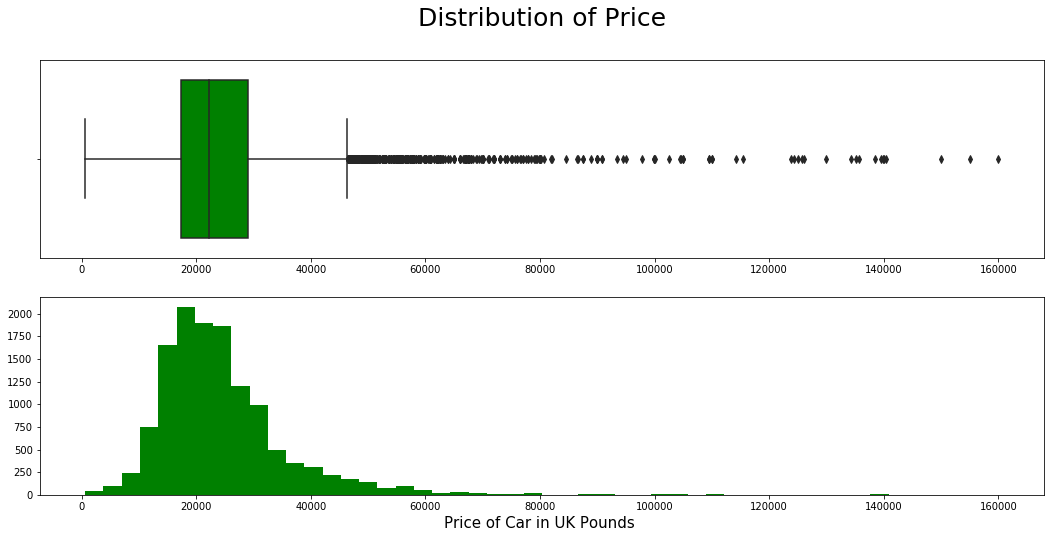

In [11]:
fig, ax = plt.subplots(2,1, figsize=(18,8)) #defining the figure

sns.distplot(merc.price, color = 'green', ax= ax[1],kde = False, hist_kws=dict(alpha=1)) #plotting the histogram
sns.boxplot(merc.price, color = 'green', ax= ax[0], saturation = 1) #plotting the boxplot

ax[0].set_title(' Distribution of Price \n', fontsize=25) #setting title
ax[0].set_xlabel(None)
ax[1].set_xlabel('Price of Car in UK Pounds ', fontsize=15) #setting x-axis label

plt.show()

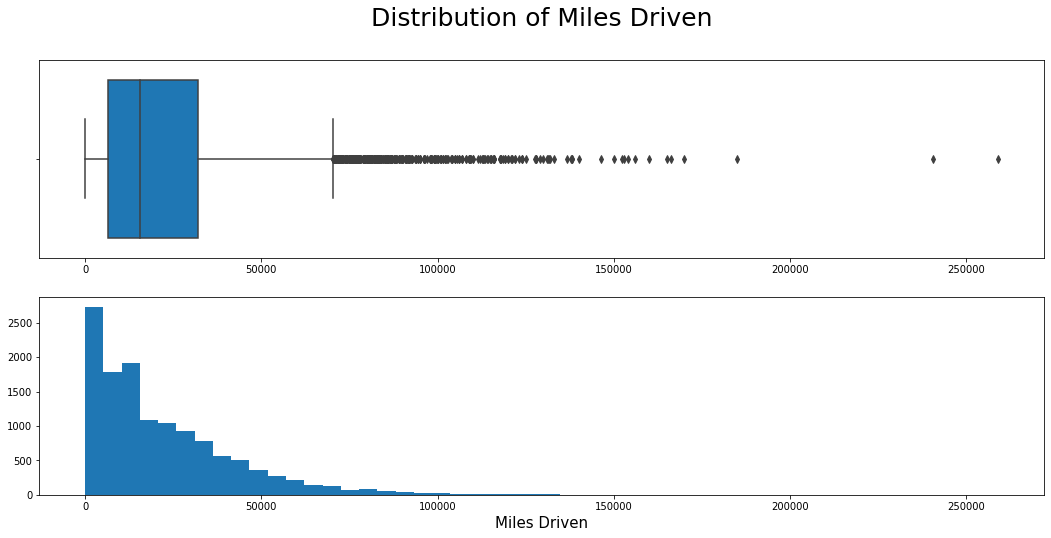

In [12]:
fig, ax = plt.subplots(2,1, figsize=(18,8)) #defining the figure

sns.distplot(merc.miles, ax= ax[1],kde = False, hist_kws=dict(alpha=1)) #plotting the histogram
sns.boxplot(merc.miles, ax= ax[0], saturation = 1) #plotting the boxplot

ax[0].set_title(' Distribution of Miles Driven \n', fontsize=25) #setting title
ax[0].set_xlabel(None)
ax[1].set_xlabel('Miles Driven', fontsize=15) #setting x-axis label

plt.show()

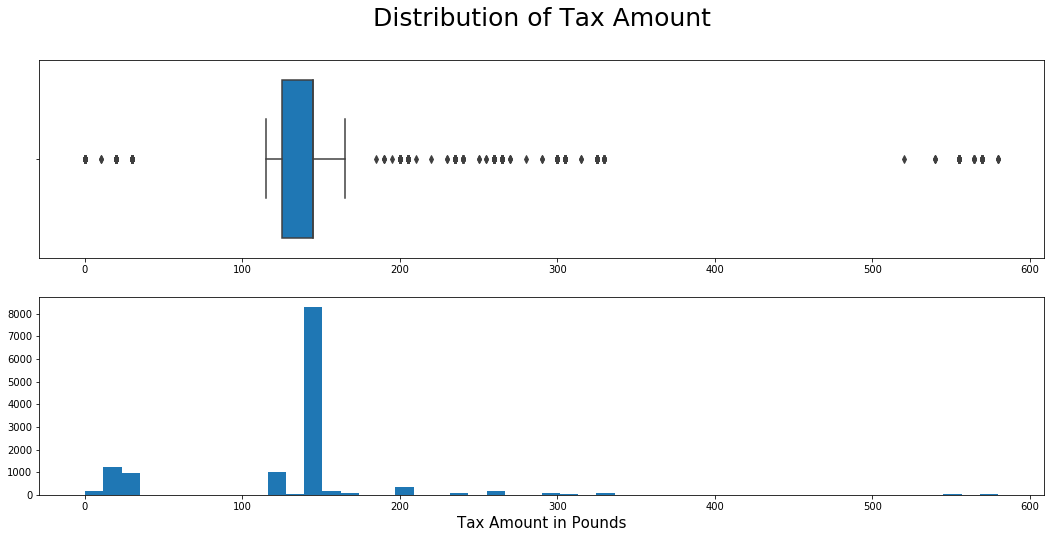

In [13]:
fig, ax = plt.subplots(2,1, figsize=(18,8)) #defining the figure

sns.distplot(merc.tax, ax= ax[1],kde = False, hist_kws=dict(alpha=1)) #plotting the histogram
sns.boxplot(merc.tax, ax= ax[0], saturation = 1) #plotting the boxplot

ax[0].set_title(' Distribution of Tax Amount \n', fontsize=25) #setting title
ax[0].set_xlabel(None)
ax[1].set_xlabel('Tax Amount in Pounds', fontsize=15) #setting x-axis label

plt.show()

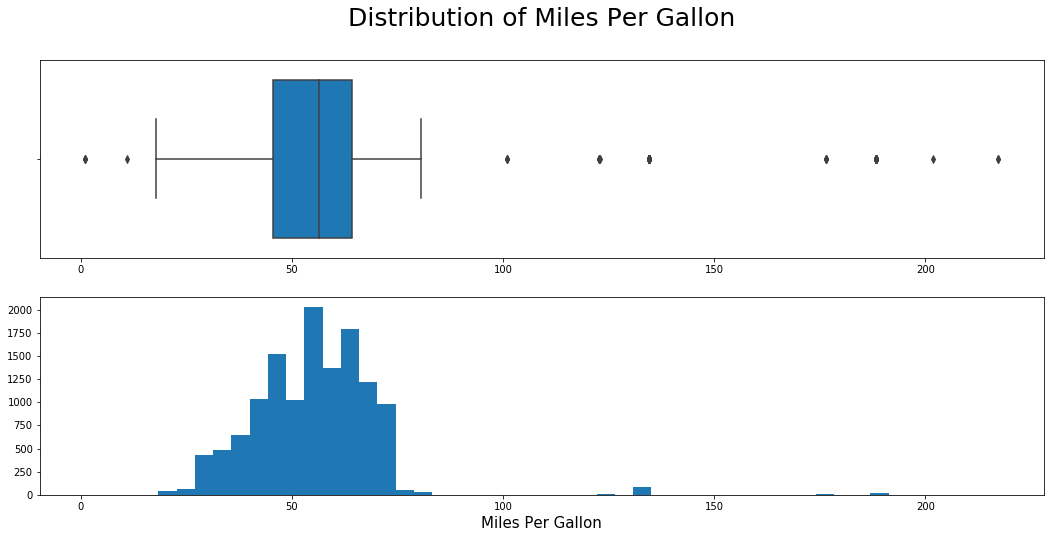

In [14]:
fig, ax = plt.subplots(2,1, figsize=(18,8)) #defining the figure

sns.distplot(merc.mpg, ax= ax[1],kde = False, hist_kws=dict(alpha=1)) #plotting the histogram
sns.boxplot(merc.mpg, ax= ax[0], saturation = 1) #plotting the boxplot

ax[0].set_title(' Distribution of Miles Per Gallon \n', fontsize=25) #setting title
ax[0].set_xlabel(None)
ax[1].set_xlabel('Miles Per Gallon', fontsize=15) #setting x-axis label

plt.show()

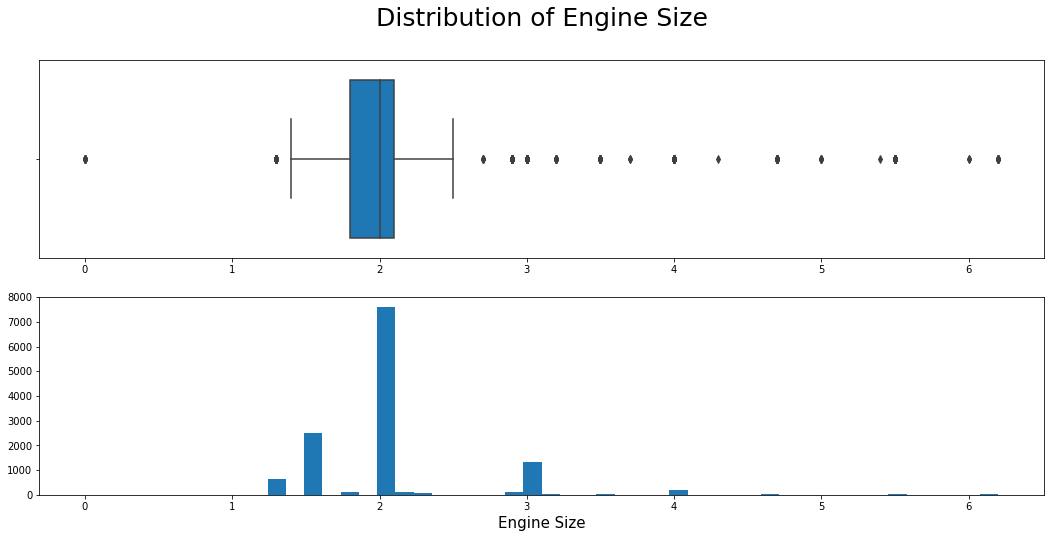

In [15]:
fig, ax = plt.subplots(2,1, figsize=(18,8)) #defining the figure

sns.distplot(merc.engineSize, ax= ax[1],kde = False, hist_kws=dict(alpha=1)) #plotting the histogram
sns.boxplot(merc.engineSize, ax= ax[0], saturation = 1) #plotting the boxplot

ax[0].set_title(' Distribution of Engine Size \n', fontsize=25) #setting title
ax[0].set_xlabel(None)
ax[1].set_xlabel('Engine Size', fontsize=15) #setting x-axis label

plt.show()

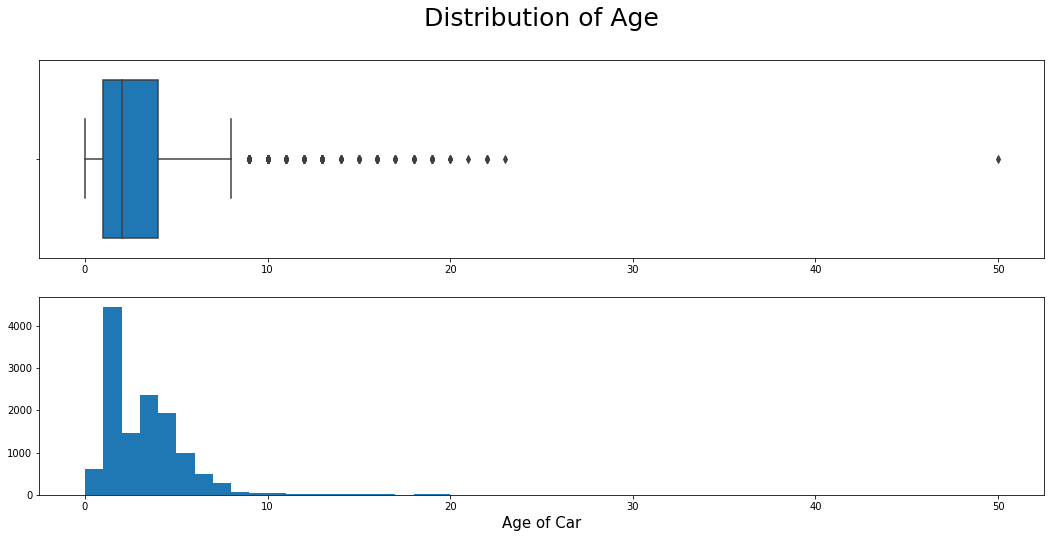

In [16]:
fig, ax = plt.subplots(2,1, figsize=(18,8)) #defining the figure

sns.distplot(merc.age, ax= ax[1],kde = False, hist_kws=dict(alpha=1)) #plotting the histogram
sns.boxplot(merc.age, ax= ax[0], saturation = 1) #plotting the boxplot

ax[0].set_title(' Distribution of Age \n', fontsize=25) #setting title
ax[0].set_xlabel(None)
ax[1].set_xlabel('Age of Car', fontsize=15) #setting x-axis label

plt.show()

**Observations from Visualisation of Feature Distributions:**
* Presence of outliers in all 6 features
* Non-normal distribution of all features
* Engine size has a value of 0, which seems to be a data entry error as Engize Size can not be 0
* MPG has an outlier value of 1.1 , which seems to be an error

**Actions to be taken :**
* Treat the anamolies in the data
* Run a regression model to check the outlier influence before treating the  outlier points

**Anomalies treatment :**

In [ ]:
# Finding number of records with engineSize = 0 
print('Total number of records with Engine Size of 0 : ', merc[merc['engineSize']==0].shape[0])

In [17]:
# dropping these 12 records with engine size 0
merc = merc[merc['engineSize']!=0]

print('\nNumber of records after removing records with EngineSize 0 :' ,merc.shape[0])
print('\nLowest Engine Size value after removing 0 : ', merc['engineSize'].min())

Total number of records with Engine Size of 0 :  12

Number of records after removing records with EngineSize 0 : 12848

Lowest Engine Size value after removing 0 :  1.3


In [ ]:
# Finding number of records with mpg = 1.1
print('Total number of records with MPG value of 1.1 : ', merc[merc['mpg']==1.1].shape[0])

In [18]:
# dropping these 3 records with mpg 1.1
merc = merc[merc['mpg']!=1.1]

print('\nNumber of records after removing records with MPG of 1.1 :' ,merc.shape[0])
print('\nLowest MPG value after removing 1.1 : ', merc['mpg'].min())

Total number of records with MPG value of 1.1 :  3

Number of records after removing records with MPG of 1.1 : 12845

Lowest MPG value after removing 1.1 :  11.0


**Now that the dataset is cleaned, we can convert 'transmission', 'fuelType' & 'model' as category datatype for faster operations:**

In [19]:
merc['model'] = merc['model'].astype('category')
merc['transmission'] = merc['transmission'].astype('category')
merc['fuelType'] = merc['fuelType'].astype('category')

### D8. Exploring distribution of records for each Categorical Attribute

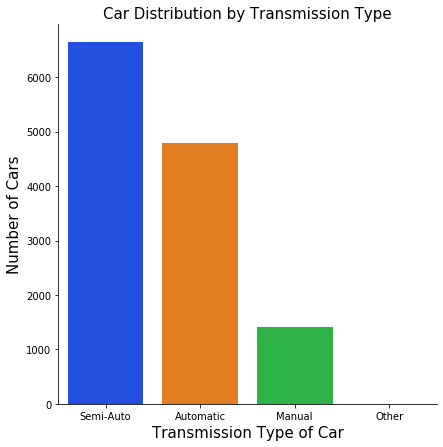

In [26]:
sns.catplot(x="transmission",data=merc,kind="count",
            order = ['Semi-Auto','Automatic','Manual', 'Other'],
            height=6,
           palette='bright')

plt.title('Car Distribution by Transmission Type', fontsize=15)
plt.xlabel('Transmission Type of Car',fontsize=15)
plt.ylabel('Number of Cars',fontsize=15)

plt.show()

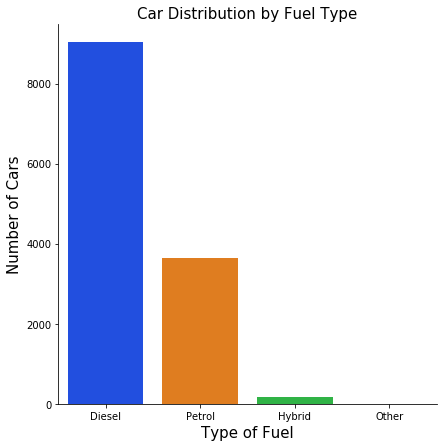

In [27]:
sns.catplot(x="fuelType",data=merc,kind="count",
            order = ['Diesel','Petrol','Hybrid', 'Other'],
            height=6,
           palette='bright')
plt.title('Car Distribution by Fuel Type', fontsize=15)
plt.xlabel('Type of Fuel',fontsize=15)
plt.ylabel('Number of Cars',fontsize=15)

plt.show()

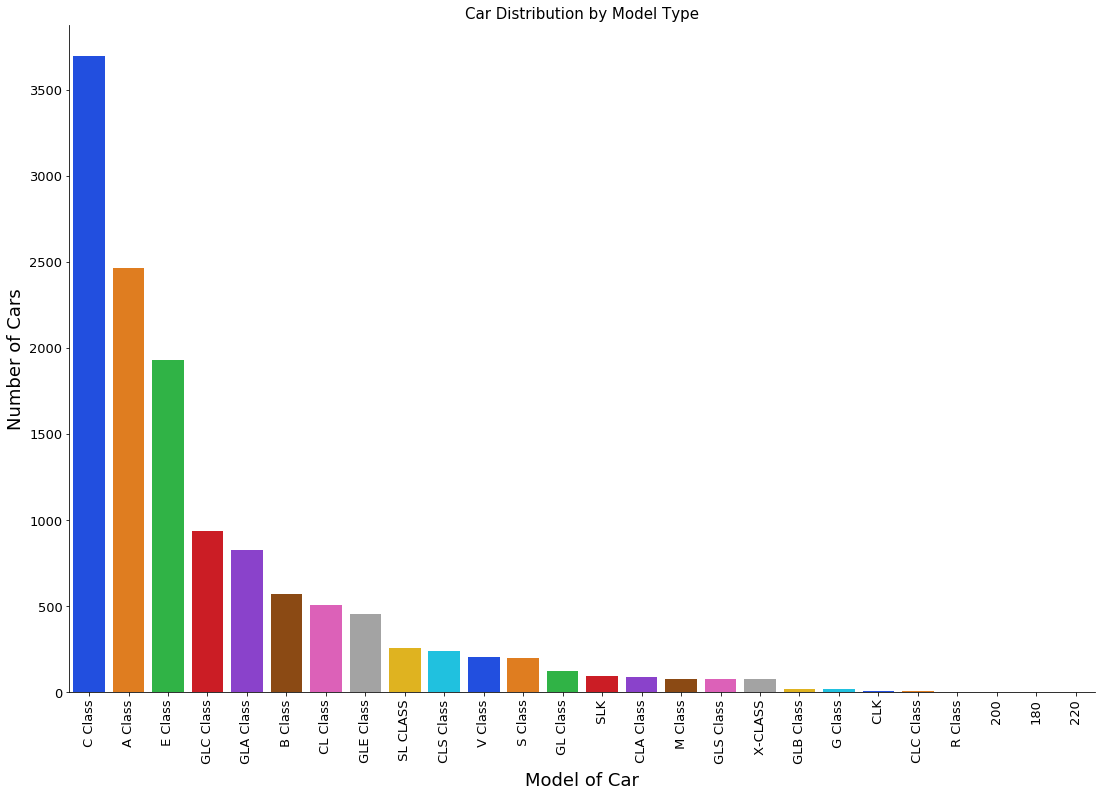

In [28]:
sns.catplot(x="model",data=merc,kind="count",
            order = merc['model'].value_counts().index,
            height=10, aspect=1.5,
           palette='bright')
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.title('Car Distribution by Model Type', fontsize=15)
plt.xlabel('Model of Car',fontsize=18)
plt.ylabel('Number of Cars',fontsize=18)
plt.show()

### D8. Exploring relationships b/w Resale Price (dependent variable) & numerical attributes

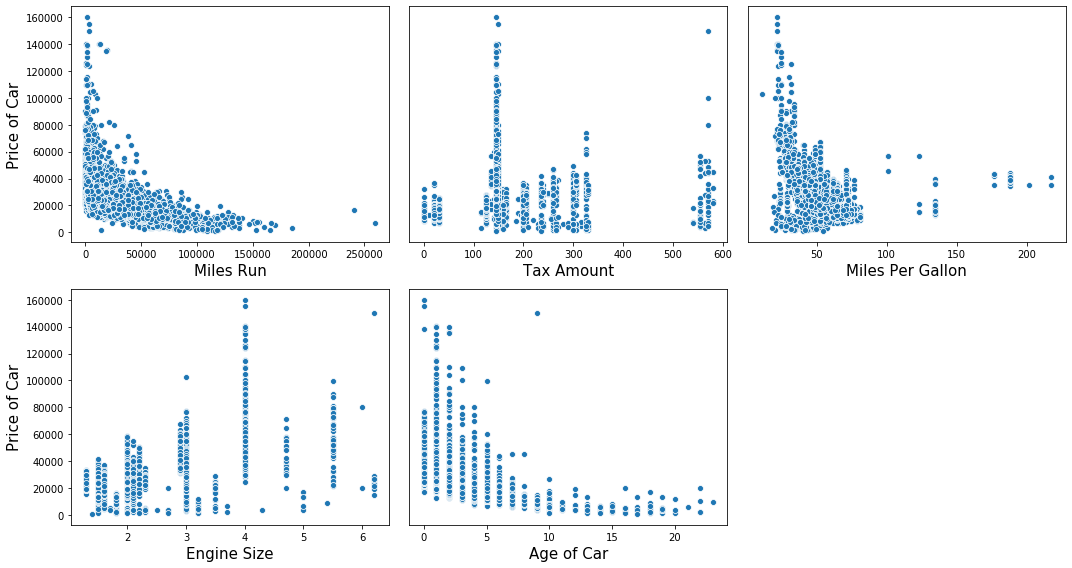

In [94]:
fig, ax = plt.subplots(2,3,figsize=(15,8))

# plotting scatterplots
sns.scatterplot(merc.miles, merc.price, ax = ax[0,0])
sns.scatterplot(merc.tax, merc.price, ax = ax[0,1])
sns.scatterplot(merc.mpg, merc.price, ax = ax[0,2])
sns.scatterplot(merc.engineSize, merc.price, ax = ax[1,0])
sns.scatterplot(merc.age, merc.price, ax = ax[1,1])

# setting y-axis labels
ax[0,0].set_ylabel("Price of Car", fontsize=15)
ax[1,0].set_ylabel("Price of Car", fontsize=15)

#setting x-axis labels
ax[0,0].set_xlabel("Miles Run", fontsize=15)
ax[0,1].set_xlabel("Tax Amount", fontsize=15)
ax[0,2].set_xlabel("Miles Per Gallon", fontsize=15)
ax[1,0].set_xlabel("Engine Size", fontsize=15)
ax[1,1].set_xlabel("Age of Car", fontsize=15)

# removing unnecesary ticks, labels and figures
ax[0,1].set_ylabel(None)
ax[0,2].set_ylabel(None)
ax[1,1].set_ylabel(None)
ax[0,1].set_yticks([])
ax[0,2].set_yticks([])
ax[1,1].set_yticks([])
fig.delaxes(ax[1,2])

plt.tight_layout()
plt.show()

**Observation :**

We can see from the plots above that the predictor features don't have a perfect linear relationship with the target variable

### D9. Creating dummy variables for Categorical Variables

**Note : There are other categorical encoding techniques as well for nominal categories, which can also be tried.**

- Target Encoding (Categories are replaced by the mean value of the target variable for that category)

- Count Encoding (Categories are replaced by total count of those categories)

In [83]:
merc_dummy = pd.get_dummies(merc, drop_first = True)

merc_dummy.columns

Index(['price', 'miles', 'tax', 'mpg', 'engineSize', 'age', 'model_ B Class',
       'model_ C Class', 'model_ CL Class', 'model_ CLA Class',
       'model_ CLC Class', 'model_ CLK', 'model_ CLS Class', 'model_ E Class',
       'model_ G Class', 'model_ GL Class', 'model_ GLA Class',
       'model_ GLB Class', 'model_ GLC Class', 'model_ GLE Class',
       'model_ GLS Class', 'model_ M Class', 'model_ R Class',
       'model_ S Class', 'model_ SL CLASS', 'model_ SLK', 'model_ V Class',
       'model_ X-CLASS', 'model_180', 'model_200', 'model_220',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [84]:
merc_dummy.shape

(12845, 37)

# E. Checking for multi-collinearity 

### E1. Checking pair-wise correlation between predictor variables

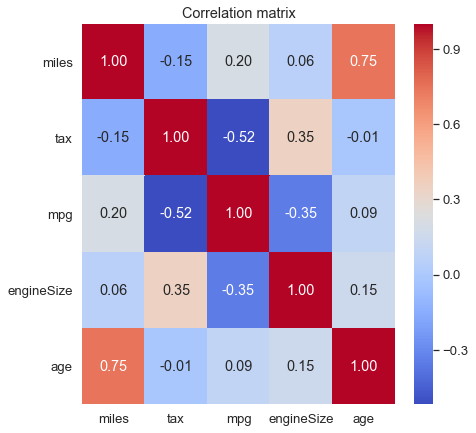

In [27]:
df_temp = merc.drop(['price','transmission','fuelType','model'],axis=1)

plt.figure(figsize=(7,7))
ax = sns.heatmap(df_temp.corr(), cmap='coolwarm',annot=True,fmt = ".2f")
top,bottom = ax.get_ylim()
ax.set_ylim(top + 0.5, bottom - 0.5)
plt.yticks(rotation=0) 
plt.title('Correlation matrix')
plt.show()

**Observations :**

- **miles & age** - moderate +ve correlation of 0.75
- **tax & mpg** - moderate -ve correlation of -0.52

Next, we explore the VIF values to better understand multi-collinearity


### E2. Checking VIF values to detect multi-collinearity

**Action :** Variables with VIF scores more than 10 will be dropped to reduce multicollinearity

In [28]:
# Creating a separate dataframe with only predictor variables
merc_predictors = merc_dummy.drop(['price'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining a function to calculate VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# applying the custom VIF function on predictor variable dataframe
df_vif = calc_vif(merc_predictors)
df_vif.sort_values('VIF', ascending=False).head() #showing  only highest 5 vif scores

,variables,VIF
3,engineSize,18.402318
2,mpg,11.319282
1,tax,7.598290
4,age,6.981850
0,miles,5.416485


**Action :** 'engineSize' has highest VIF and the value is more than 10. This means that information provided by the variable 'engineSize' is well explained by other variables too. Hence we drop 'engineSize' and calculate VIF of other variables again.

In [29]:
# dropping engineSize variable
df_vif_2 = calc_vif(merc_predictors.drop('engineSize', axis=1))

# Again calculating VIF on rest of predictor variables
df_vif_2.sort_values('VIF', ascending=False).head() #showing  only highest 5 vif scores

,variables,VIF
2,mpg,8.851173
3,age,6.797306
1,tax,6.604499
0,miles,5.415344
31,transmission_Semi-Auto,2.572637


**Observation :** All VIF scores are below 10 after dropping engineSize

**So for modelling purposes we will drop - engineSize - from our dataset**

# H. Preparing Data for Model Application

### H1. Removing the column with high multi-collinearity i.e. 'engineSize' (found in VIF analysis)

In [97]:
merc_dummy2 = merc_dummy.drop(['engineSize'], axis=1)
merc_dummy2.shape

(12845, 36)

### H2. Splitting data in train & test sets

In [98]:
# splitting data into test and train set

X = merc_dummy2.drop('price',axis=1)
y = merc_dummy2['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# I. Linear Reg Model

## I1. LR Model Run 1
This is the first run of the LR  model. Note that we have not treated outliers and have not tranformed any variables till now.

In [99]:
# OLS Model

import statsmodels.api as sm

X_const1 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_const1)
LR1 = est.fit()
print(LR1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     568.6
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:53:04   Log-Likelihood:                -98975.
No. Observations:                9633   AIC:                         1.980e+05
Df Residuals:                    9599   BIC:                         1.983e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.24

**Observations**

- We get an adjusted R2 of 66% which is low for the type of predictive model we want.
- At the same time the multicollinearity is high


### RESIDUAL ANALYSIS - Checking Normal Distribution of residuals using Q-Q Plot

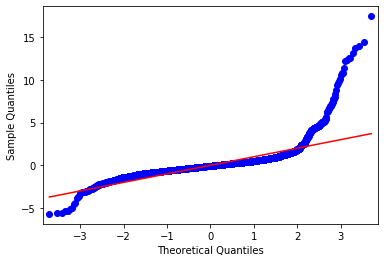

In [100]:
res1 = LR1.resid # residuals
std1 = statistics.stdev(res1)

fig = sm.qqplot(res1/std1, line='s')
plt.show()

**Observation :** We see that points in middle lie to close to the 45-degree line with major deviations at the ends. We can say that distrbution of residuals is not Normal Distribution and has major deviation.

### RESIDUAL ANALYSIS - Plot of 'Residuals' vs 'Fitted Values' to check for Heteroscedasticity

In [101]:
train_data = X_train.copy()
train_data['price'] = y_train

ypred = LR1.predict(X_const1) # training set predictions

train_data['pred_price_LR1']=ypred
train_data['residual_LR1'] = res1
train_data['studentized_residual_LR1'] = res1/std1

In [91]:
train_data.columns

Index(['miles', 'tax', 'mpg', 'age', 'model_ B Class', 'model_ C Class',
       'model_ CL Class', 'model_ CLA Class', 'model_ CLC Class', 'model_ CLK',
       'model_ CLS Class', 'model_ E Class', 'model_ G Class',
       'model_ GL Class', 'model_ GLA Class', 'model_ GLB Class',
       'model_ GLC Class', 'model_ GLE Class', 'model_ GLS Class',
       'model_ M Class', 'model_ R Class', 'model_ S Class', 'model_ SL CLASS',
       'model_ SLK', 'model_ V Class', 'model_ X-CLASS', 'model_180',
       'model_200', 'model_220', 'transmission_Manual', 'transmission_Other',
       'transmission_Semi-Auto', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol', 'price', 'pred_price_LR1', 'residual_LR1',
       'studentized_residual_LR1'],
      dtype='object')

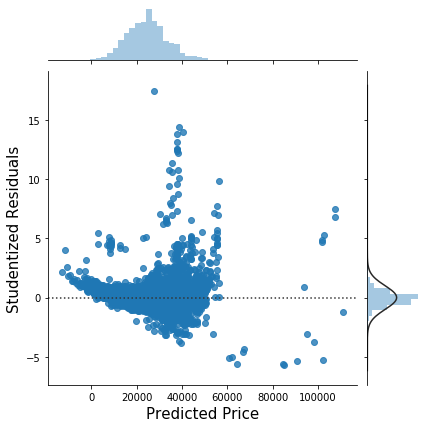

In [29]:
plot = sns.jointplot(x='pred_price_LR1',y='studentized_residual_LR1',data=train_data,kind='resid')

plot.set_axis_labels('Predicted Price', 'Studentized Residuals', fontsize=15)

plt.show()

### The above plot indicates:

- Presence of **OUTLIERS** (Studentized Residual values greater than 3 indicate outliers.)
- Presence of **HETEROSCEDASTICITY** and this needs to be addressed in order to further improve model performance.



## I2.  LR Model Run 2 - After removing outliers:

### Remove outlier  records where Studentized Residual > 3

In [102]:
no_outlier_df = train_data[train_data['studentized_residual_LR1']<=3]

print('Max studentized residual in data : ',no_outlier_df['studentized_residual_LR1'].max())
print('\n')
print(train_data.shape[0] - no_outlier_df.shape[0] , 'outliers removed')

Max studentized residual in data :  2.92931864247325


132 outliers removed


In [103]:
X_train2 = no_outlier_df.drop(['price','pred_price_LR1','residual_LR1','studentized_residual_LR1'], axis=1)
y_train2 = no_outlier_df['price']

In [104]:
# OLS model
X_const2 = sm.add_constant(X_train2)
est = sm.OLS(y_train2, X_const2)
LR2 = est.fit()
print(LR2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1082.
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:54:14   Log-Likelihood:                -93415.
No. Observations:                9501   AIC:                         1.869e+05
Df Residuals:                    9467   BIC:                         1.871e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.96

**Observation :**
* We can see that after outliers removal the R-square value has increase from 0.66 to 0.79 . This means that the outlier values have a large influence on the linear model


**Note :**

* Unlike the anomalies that were earlier removed, these outlier poitns could be valid car records. The final decision to keep or remove the outlier should be taken after discussing about the outliers with a domain expert.

* If the ouliers are not valid records, they can be removed.

* If they are valid  records, then we can transform the features by hit-n-trial approach with log transform, reciprocal transform, square-root transform etc, and then check the regression model.

### RESIDUAL ANALYSIS - Checking Normal Distribution of residuals using Q-Q Plot

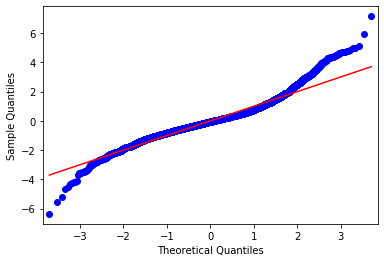

In [105]:
res2 = LR2.resid # residuals
std2 = statistics.stdev(res2)

fig = sm.qqplot(res2/std2, line='s')
plt.show()

**Observation :** 

The distribution of residuals is closer to normal distribution compared to last model, but is still not normally distributed 

### RESIDUAL ANALYSIS - Plot of 'Residuals' vs 'Fitted Values' to check for Heteroscedasticity

In [106]:
ypred = LR2.predict(X_const2) # training set predictions

train_data2 = X_train2.copy()
train_data2['price'] = y_train2


train_data2['pred_price_LR2'] = ypred
train_data2['residual_LR2'] = res2
train_data2['studentized_residual_LR2'] = res2/std2

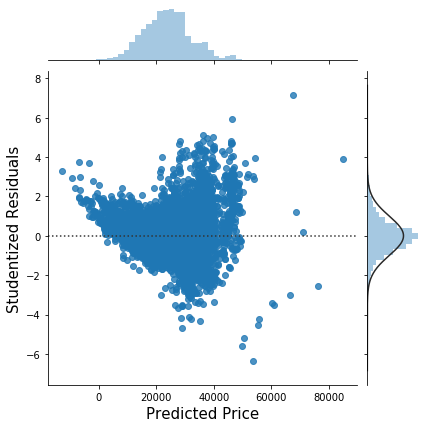

In [107]:
plot = sns.jointplot(x='pred_price_LR2',y='studentized_residual_LR2',data=train_data2,kind='resid')

plot.set_axis_labels('Predicted Price', 'Studentized Residuals', fontsize=15)

plt.show()

**Observation :**

Heteroscedasticity is still present in the residuals even after removing outliers from original data

## I3. LR Model Run 3 : Reducing Heteroscedasticity 

In [109]:
train_data2['log_price'] = train_data2['price'].apply(np.log)

X_train3 = train_data2.drop(['price','log_price','pred_price_LR2','residual_LR2','studentized_residual_LR2'], axis=1)
y_train_log = train_data2['log_price']

In [111]:
# OLS model
X_const3 = sm.add_constant(X_train3)
est = sm.OLS(y_train_log, X_const3)
LR3 = est.fit()
print(LR3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1821.
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:58:02   Log-Likelihood:                 4343.7
No. Observations:                9501   AIC:                            -8619.
Df Residuals:                    9467   BIC:                            -8376.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10

### RESIDUAL ANALYSIS - Plot of 'Residuals' vs 'Fitted Values' to check for Heteroscedasticity

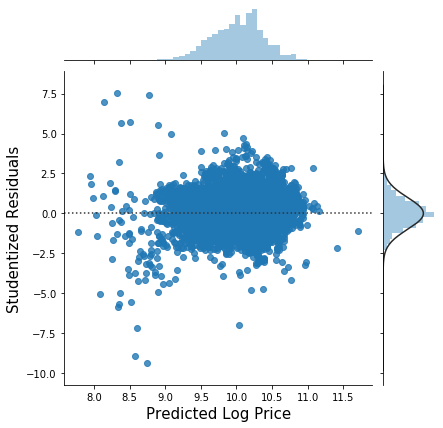

In [131]:
res3 = LR3.resid # residuals
std3 = statistics.stdev(res3)

ypred = LR3.predict(X_const3) # training set predictions

log_data = X_train3.copy()
log_data['price'] = y_train

log_data['log_pred_price']=ypred
log_data['act_pred_price_LR3']=np.exp(ypred)
log_data['residual_lg'] = res3
log_data['studentized_residual_lg'] = res3/std3


plot = sns.jointplot(x='log_pred_price',y='studentized_residual_lg',data=log_data,kind='resid')
plot.set_axis_labels('Predicted Log Price', 'Studentized Residuals', fontsize=15)
plt.show()

**Observation :**

We see that taking Log(price) has dampened the heteroskedasticty. The plot shows lesser extent of heteroscedasticity compared to earlier models.

## I4. LR Model Run 4 : After removing the 5 insignificant predictors 

In [113]:
X_train_log = log_data.drop(['price','log_pred_price','act_pred_price_LR3',
                             'residual_lg', 'studentized_residual_lg', 'model_ R Class',
                             'model_ SLK', 'model_180','model_200', 'transmission_Other'],
                              axis=1)
# OLS model
X_const4 = sm.add_constant(X_train_log)
est = sm.OLS(y_train_log, X_const4)
LR4 = est.fit()
print(LR4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     2072.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:02:12   Log-Likelihood:                 4342.8
No. Observations:                9501   AIC:                            -8626.
Df Residuals:                    9471   BIC:                            -8411.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10

In [114]:
# dropping insignificant columns from test set
X_test_minimal = X_test.drop(['model_ R Class', 'model_ SLK',
                               'model_180','model_200','transmission_Other'], axis=1)

In [116]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

# running the model on test dataset to and finding RMSE
X2 = sm.add_constant(X_test_minimal)
log_ypred = LR4.predict(X2)
ypred = np.exp(log_ypred)

RMSE = sqrt(mean_squared_error(y_test,ypred))
print('RMSE of the LR model is ', RMSE)

RMSE of the LR model is  5746.7268351083785


# J. PCA to reduce multicollinearity

## J1. LR Model with PCA

In [117]:
X = merc_dummy.drop('price',axis=1)
y = merc_dummy['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(.99)
pca.fit(X_train_scaled)

print('Number of selected principal components : ', pca.n_components_)

Number of selected principal components :  23


In [119]:
X_train_PCs = pca.transform(X_train_scaled)
X_test_PCs = pca.transform(X_test_scaled)

In [120]:
X_const_pca = sm.add_constant(X_train_PCs)
est = sm.OLS(y_train, X_const_pca)
LR_pca = est.fit()
print(LR_pca.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1181.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:09:11   Log-Likelihood:                -97728.
No. Observations:                9633   AIC:                         1.955e+05
Df Residuals:                    9609   BIC:                         1.957e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.464e+04     62.862    391.930      0.0

**Observation:**

We can see that there is no warning of  multicollinearity for the LR model trained using Principal Components 

### RESIDUAL ANALYSIS - Checking Normal Distribution of residuals using Q-Q Plot

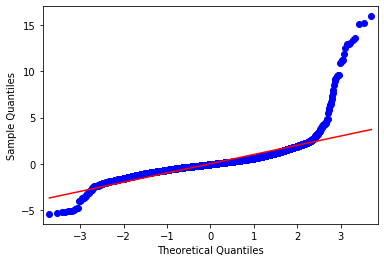

In [121]:
res_pca = LR_pca.resid # residuals

std_pca = statistics.stdev(res_pca)

fig = sm.qqplot(res_pca/std_pca, line='s')
plt.show()

### RESIDUAL ANALYSIS - Plot of 'Residuals' vs 'Fitted Values' to check for Heteroscedasticity

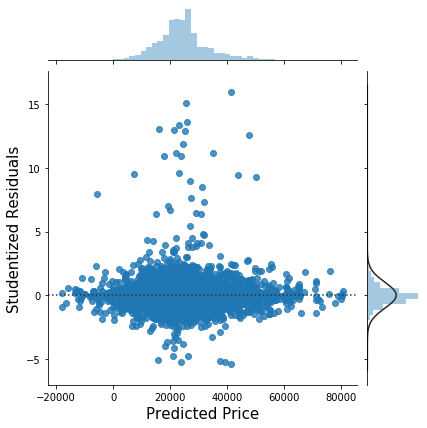

In [125]:
ypred = LR_pca.predict(X_const_pca) # training set predictions

train_data_pca = pd.DataFrame(X_train_PCs)
train_data_pca['price'] = y_train


train_data_pca['pred_price'] = ypred
train_data_pca['residual'] = res_pca
train_data_pca['studentized_residual'] = res_pca/std_pca


plot = sns.jointplot(x='pred_price',y='studentized_residual',data=train_data_pca,kind='resid')
plot.set_axis_labels('Predicted Price', 'Studentized Residuals', fontsize=15)
plt.show()

**Observations :**
* LR model with PCs, has outliers in residuals
* Residuals have heteroscedasticity 

## J2. LR model with PCA and log(price) to redue heteroscedasticity

In [127]:
y_train_log = y_train.apply(np.log)

In [128]:
X_const_pca2 = sm.add_constant(X_train_PCs)
est = sm.OLS(y_train_log, X_const_pca2)
LR_pca_logy = est.fit()
print(LR_pca_logy.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     2919.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:21:41   Log-Likelihood:                 4312.7
No. Observations:                9633   AIC:                            -8577.
Df Residuals:                    9609   BIC:                            -8405.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0163      0.002   6349.178      0.0

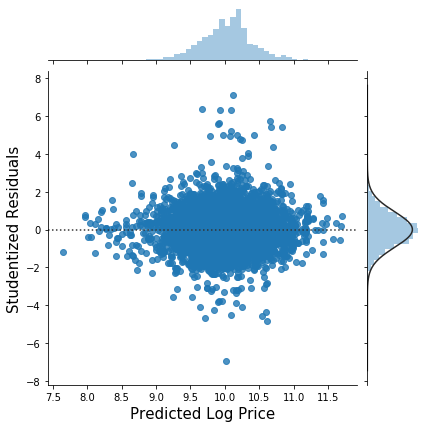

In [134]:
res_pca_logy = LR_pca_logy.resid # residuals
std_pca_logy = statistics.stdev(res_pca_logy)

ypred = LR_pca_logy.predict(X_const_pca2) # training set predictions

pca_data_log = pd.DataFrame(X_train_PCs)
pca_data_log['price'] = y_train

pca_data_log['log_pred_price'] = ypred
pca_data_log['act_pred_price']=np.exp(ypred)
pca_data_log['residual_lg'] = res_pca_logy
pca_data_log['studentized_residual_lg'] = res_pca_logy/std_pca_logy


plot = sns.jointplot(x='log_pred_price',y='studentized_residual_lg',data=pca_data_log,kind='resid')
plot.set_axis_labels('Predicted Log Price', 'Studentized Residuals', fontsize=15)
plt.show()

In [136]:
# running the model on test dataset to and finding RMSE
X_test_PCs_const = sm.add_constant(X_test_PCs)
log_ypred = LR_pca_logy.predict(X_test_PCs_const)
ypred = np.exp(log_ypred)

RMSE = sqrt(mean_squared_error(y_test,ypred))
print('RMSE of the LR model with PCs is ', RMSE)

RMSE of the LR model with PCs is  4721.190500039233


# J. Decision Tree Regressor

Taking all features into consideration

In [50]:
# splitting data into test and train set

X = merc_dummy.drop('price',axis=1)
y = merc_dummy['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [51]:
# using GridSearchCV to find optimum depth parameters for decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor  as DTR 

params = {'max_depth': range(1,21)}

grid_search_cv = GridSearchCV(DTR(random_state=42), param_grid = params, cv=5)
grid_search_cv.fit(X_train, y_train)

DTR_best = grid_search_cv.best_estimator_
DTR_best

DecisionTreeRegressor(max_depth=13, random_state=42)

In [52]:
# RMSE on Test Set
pred = DTR_best.predict(X_test) #make prediction on test set
RMSE = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE of DTR model is ',RMSE)
print("R2 of DTR model: ", DTR_best.score(X_test, y_test))

RMSE of DTR model is  3196.2059488056825
R2 of DTR model:  0.9203657957633146


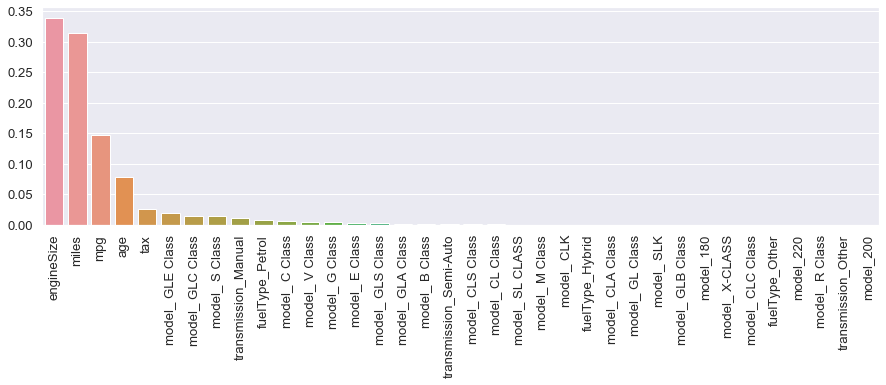

In [53]:
# Plotting the feature importance as given by DTR
feature_imp = pd.Series(DTR_best.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = feature_imp, x = feature_imp.index, ax=ax)
plt.xticks(rotation=90)
plt.show()

# K. Random Forest Model

Taking all predictor variables as Random Forest Model is robust to multi-collinearity

In [54]:
# using GridSearchCV to find optimum depth parameters for RFR
from sklearn.ensemble import RandomForestRegressor as RFR

# default n_estimators =100 which we are using here
params = {'max_depth': range(2,20), 'max_features': range(2,24,2)}

grid_search_cv = GridSearchCV(RFR(random_state=42), param_grid = params, cv=5)
grid_search_cv.fit(X_train, y_train)

RF = grid_search_cv.best_estimator_
RF

RandomForestRegressor(max_depth=18, max_features=18, random_state=42)

In [55]:
# error on Test Set
pred = RF.predict(X_test) #make prediction on test set
RMSE = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE of RF model is ', RMSE)
print("R2 of RF model: ", RF.score(X_test, y_test))

RMSE of RF model is  2471.4301539104304
R2 of RF model:  0.952386860799056


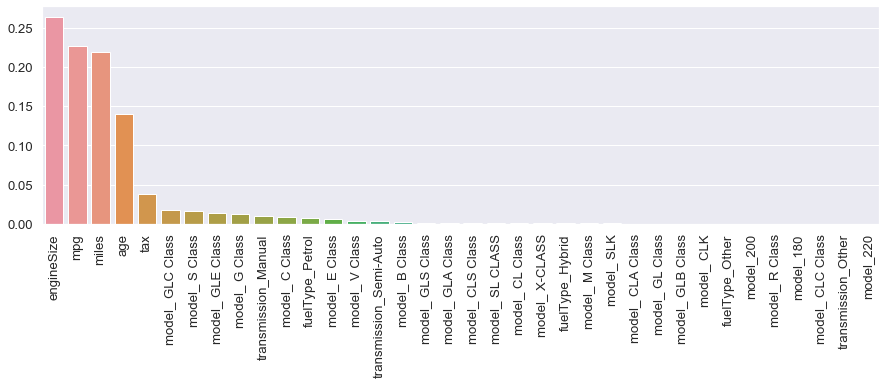

In [56]:
# checking feature importance score in random forest model

feature_imp = pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = feature_imp, x = feature_imp.index, ax=ax)
plt.xticks(rotation=90)
plt.show()

# L. Model Selection :

In [138]:
model = ['LR','LR_PCA', 'DTR', 'RFR']
RMSE = [5746.727,4721.190, 3240.610, 2448.047]
R2 = [0.86,0.87, 0.92,0.95]
model_outcome = pd.DataFrame({'model':model, 'RMSE':RMSE, 'R2' : R2})
model_outcome

,model,RMSE,R2
0,LR,5746.727,0.86
1,LR_PCA,4721.190,0.87
2,DTR,3240.610,0.92
3,RFR,2448.047,0.95


We are getting the lowest error by using the Random Forest Model, hence it should be selected out of all 3.